In [55]:
# importing essential libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report 

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import layers

In [56]:
path = r"C:\Users\Amatari Ebi\Desktop\Data Science\TechCrush\Artificial Intelligence\Face Mask Recognition System Project\Face Mask dataset"

In [57]:
# specifying image dimension and batch size

img_size = (224, 224)
batchSize = 32

In [58]:
# defining instance
datagen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [59]:
# creating train set
train_set = datagen.flow_from_directory(
    path,
    target_size=img_size,
    batch_size=batchSize,
    class_mode="categorical",
    subset="training",
    shuffle=True,
)

Found 3648 images belonging to 3 classes.


In [60]:
# creating test set
test_set = datagen.flow_from_directory(
    path,
    target_size=img_size,
    batch_size=batchSize,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

Found 911 images belonging to 3 classes.


In [61]:
# checking the values of labels
print(train_set.class_indices)

{'Correct': 0, 'Incorrect': 1, 'NoMask': 2}


In [62]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_set.num_classes, activation='softmax')
])

In [63]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["Accuracy"])

In [64]:
history = model.fit(train_set, epochs=10, validation_data=test_set) 

Epoch 1/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - Accuracy: 0.8553 - loss: 0.4032 - val_Accuracy: 0.7969 - val_loss: 0.5089
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - Accuracy: 0.8964 - loss: 0.2927 - val_Accuracy: 0.8277 - val_loss: 0.4016
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - Accuracy: 0.9213 - loss: 0.2424 - val_Accuracy: 0.8167 - val_loss: 0.4830
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - Accuracy: 0.9402 - loss: 0.1885 - val_Accuracy: 0.8375 - val_loss: 0.4573
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - Accuracy: 0.9449 - loss: 0.1694 - val_Accuracy: 0.8364 - val_loss: 0.4430
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - Accuracy: 0.9567 - loss: 0.1344 - val_Accuracy: 0.8639 - val_loss: 0.3713
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - Accuracy: 0.9559 - loss: 0.1318 - val_Accuracy: 0.8584 - val_loss: 0.3947
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - Accuracy: 0.9677 - loss: 0.1004 - val_Accu

In [65]:
test_loss, test_acc = model.evaluate(test_set)
print(f"Accuracy: {test_acc:.4f}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - Accuracy: 0.8716 - loss: 0.3347
Accuracy: 0.8716


In [66]:
# a classification report of the model built
y_true = test_set.classes

y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_true, y_pred))

29/29 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       311
           1       0.92      0.72      0.81       300
           2       0.88      0.96      0.92       300

    accuracy                           0.88       911
   macro avg       0.88      0.88      0.88       911
weighted avg       0.88      0.88      0.88       911



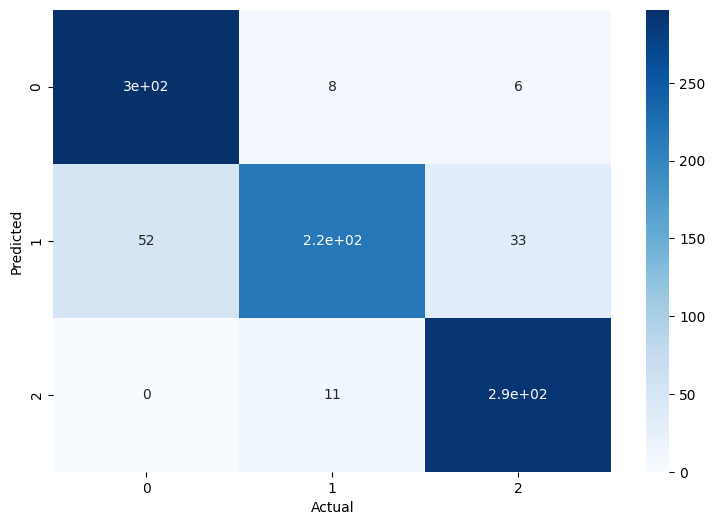

In [67]:
# A confusion matrix 
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(9,6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [68]:
#Extracts a batch of test_set images
images, labels = next(test_set)

In [69]:
predictions = model.predict(images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


In [70]:
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(labels, axis=1)

In [71]:
class_names = list(train_set.class_indices.keys())
print(class_names)

['Correct', 'Incorrect', 'NoMask']


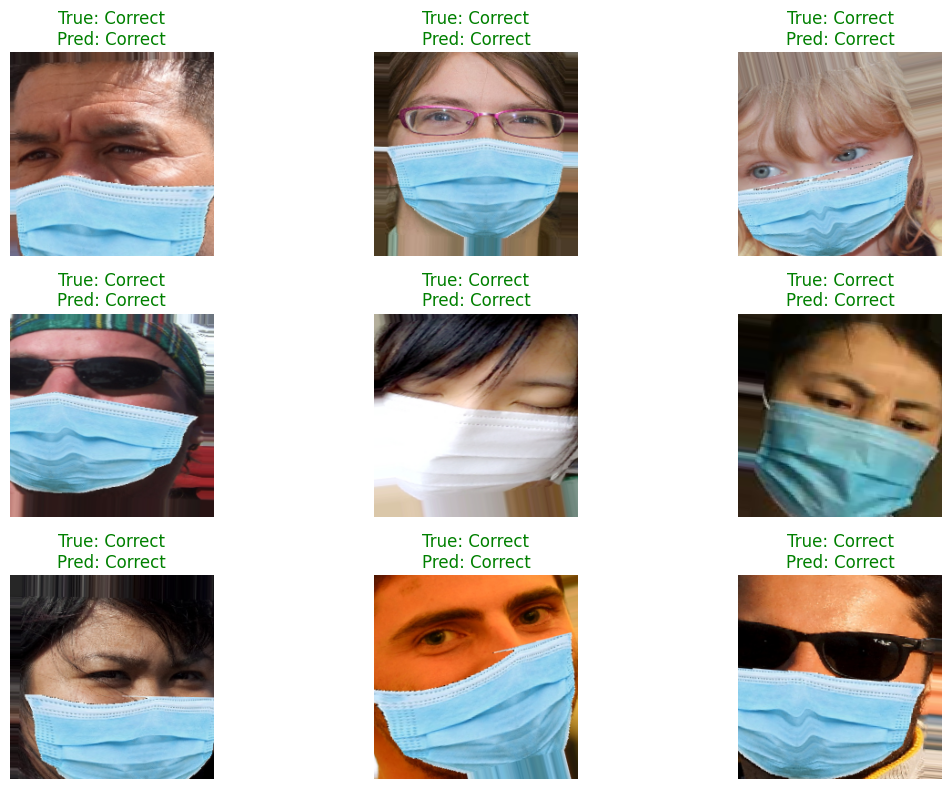

In [72]:
plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.axis("off")

    true_label = class_names[true_classes[i]]
    predicted_label = class_names[predicted_classes[i]]

    title_color = "green" if true_label == predicted_label else "red"
    plt.title(f"True: {true_label}\nPred: {predicted_label}", color=title_color)

plt.tight_layout()
plt.show()

In [73]:
# Saving the model
model.save("model.h5")